In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
columns=['latitude',

'longitude',

'housing_median_age',

'total_rooms',

'total_bedrooms',

'population',

'households',

'median_income',

'median_house_value',

'ocean_proximity']

In [5]:
df = df[columns].fillna(0)

In [6]:
df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
logvalues = np.log1p(df.median_house_value).values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

df_train.reset_index(inplace=True)
df_val.reset_index(inplace=True)
df_test.reset_index(inplace=True)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 1

In [10]:
from sklearn.feature_extraction import DictVectorizer

In [16]:
train_dicts=df_train.to_dict(orient='records')
val_dicts  = df_val.to_dict(orient='records')

In [13]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val   = dv.transform(val_dicts)

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [18]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [21]:
print(export_text(dt,feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



Answer : ocean_proximity=INLAND

# Question 2

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)

In [24]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [120]:
y_pred = rf.predict(X_val)

In [27]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [28]:
rmse(y_pred,y_val)

0.23675512851863834

Answer : 0.25

# Question 3

In [38]:
arr_n = np.linspace(10,200,20)
arr_n = [int(i) for i in arr_n]

In [63]:
result = []
for n in arr_n:
    rf = RandomForestRegressor(n_estimators=n,random_state=1,n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)
    result.append(rmse(y_pred,y_val))
    print(n,rmse(y_pred,y_val))

10 0.23675512851863834
20 0.22900471621860757
30 0.22668039533141396
40 0.22632080445624655
50 0.2260229657364224
60 0.2253789154296871
70 0.22451698904807968
80 0.22451495939414043
90 0.22419907556697843
100 0.22415059392573994
110 0.22384288220398127
120 0.22379753664352234
130 0.22383628509645018
140 0.22384476036721498
150 0.22370024346275458
160 0.2237879115052718
170 0.22375217351417973
180 0.22400264397227743
190 0.22400160624617135
200 0.22398966970562836


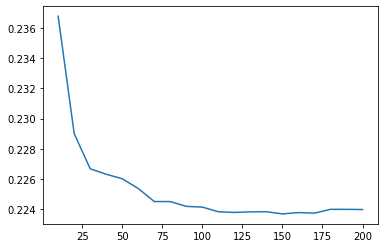

In [64]:
plt.plot(arr_n,result)

Answer : 150

# Question 4

In [66]:
result = []
for d in  [10, 15, 20, 25]:
    for n in arr_n:
        rf = RandomForestRegressor(n_estimators=n,random_state=1,n_jobs=-1,max_depth=d)
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_val)
        result.append((n,d,rmse(y_pred,y_val)))
        print(n,d,rmse(y_pred,y_val))

10 10 0.2531360919159967
20 10 0.250160138921956
30 10 0.2500991863238398
40 10 0.24999879507109937
50 10 0.25014699085941006
60 10 0.2491255811556211
70 10 0.2485817392004264
80 10 0.2484906809388729
90 10 0.24801007982092266
100 10 0.247915881168401
110 10 0.24767009644039117
120 10 0.24744911739333153
130 10 0.2473631483322449
140 10 0.24738419210378593
150 10 0.24733202805267612
160 10 0.24744885226894833
170 10 0.24731172549073063
180 10 0.24736097810522253
190 10 0.2473478442846524
200 10 0.24743575032398646
10 15 0.2364617540682653
20 15 0.22978155861185937
30 15 0.22870316839478955
40 15 0.22819951760237298
50 15 0.2277382853129101
60 15 0.2270295738881707
70 15 0.22635425845274246
80 15 0.2263982270462288
90 15 0.22606274445909566
100 15 0.22587780444616562
110 15 0.22561596014075366
120 15 0.2255867593890407
130 15 0.225841906864551
140 15 0.22584540153112556
150 15 0.2257331873135025
160 15 0.22586571120738708
170 15 0.2257750850072551
180 15 0.22604532378664546
190 15 0.226

In [67]:
df_result = pd.DataFrame(result, columns=['n_estimators','max_depth', 'rmse'])

In [70]:
df_result.sort_values('rmse')

,n_estimators,max_depth,rmse
70,110,25,0.223372
71,120,25,0.223406
74,150,25,0.223476
76,170,25,0.223510
72,130,25,0.223520
...,...,...,...
3,40,10,0.249999
2,30,10,0.250099
4,50,10,0.250147
1,20,10,0.250160


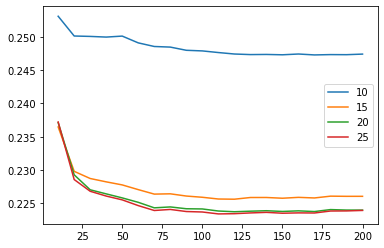

In [74]:
for d in  [10, 15, 20, 25]:
    df_subset = df_result[df_result.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d)
plt.legend()

Answer : 25

# Question 5

In [76]:
rf = RandomForestRegressor(n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1)

In [77]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [78]:
rf.feature_importances_

array([1.43375485e-02, 2.80850063e-02, 8.01677808e-02, 7.10417118e-02,
       7.08350889e-02, 3.59255380e-01, 2.59400418e-03, 3.11197069e-01,
       2.84708607e-04, 2.43581498e-04, 2.99525972e-03, 2.38573400e-02,
       1.53284139e-02, 1.97771062e-02])

In [79]:
rf_gain = pd.DataFrame()

In [80]:
rf_gain['feature'] = dv.get_feature_names()
rf_gain['feature_importances'] = rf.feature_importances_

C:\Users\Damian Marvel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [84]:
rf_gain.sort_values('feature_importances',ascending=False)

,feature,feature_importances
5,median_income,0.359255
7,ocean_proximity=INLAND,0.311197
2,index,0.080168
3,latitude,0.071042
4,longitude,0.070835
1,housing_median_age,0.028085
11,population,0.023857
13,total_rooms,0.019777
12,total_bedrooms,0.015328
0,households,0.014338


Answer : median_income

# Question 6

In [88]:
import xgboost as xgb

In [92]:
features = dv.get_feature_names()

In [99]:
features [6] = features[6].replace('<',' ')

In [104]:
dtrain = xgb.DMatrix(X_train,label=y_train,feature_names=features)
dval = xgb.DMatrix(X_val,label=y_val,feature_names=features)

In [105]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [107]:
model = xgb.train(xgb_params,dtrain,num_boost_round=200)

In [121]:
y_pred = model.predict(dval)

In [116]:
rmse(y_val,y_pred)

0.21846151270841094

In [118]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [119]:
model = xgb.train(xgb_params,dtrain,num_boost_round=200)
y_pred = model.predict(dval)
rmse(y_val,y_pred)

0.21832970975692176

Answer : Both gives same